<a href="https://colab.research.google.com/github/rashmidaga/IE7275/blob/main/M6_Lab1_AI_Agents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="background: linear-gradient(135deg, #001a70 0%, #0055d4 100%); color: white; padding: 20px; margin-bottom: 15px; text-align: center; border-radius: 10px;">
<h1 style="font-size: 28px; margin-bottom: 8px;">LangChain: Agents and Chains</h1>
<div style="background: white; color: #0055d4; padding: 4px 12px; border-radius: 10px; font-size: 13px; display: inline-block; margin-bottom: 8px;">Prof. Dehghani</div>
<p style="margin: 0; font-size: 14px;">m.dehghani@northeastern.edu</p>
</div>

<div style="background: #f0f5ff; border-radius: 10px; padding: 15px; margin-bottom: 15px; border: 1px solid #0055d4;">
<h2 style="color: #0055d4; margin-top: 0; font-size: 20px; padding-bottom: 8px; border-bottom: 2px solid #0055d4;">Lab Overview</h2>
<p style="line-height: 1.6; font-size: 15px; margin-bottom: 10px;">This lab focuses on automating multi-step reasoning and decision-making in LangChain using <strong>Chains & Agents</strong>. You'll learn how to connect multiple components, dynamically execute logic, and use LLMs to make decisions.</p>

<div style="margin-top: 15px; padding-left: 15px; border-left: 4px solid #0055d4;">
<h3 style="color: #0055d4; font-size: 16px; margin-bottom: 10px;">Learning Objectives</h3>
<div style="background: white; border-radius: 8px; padding: 12px; margin-bottom: 8px; border: 1px solid #e0e0e0;">
<span style="color: #0055d4; font-weight: bold;">1.</span> Chains in LangChain — Connect multiple LLM calls in a sequence
</div>
<div style="background: white; border-radius: 8px; padding: 12px; margin-bottom: 8px; border: 1px solid #e0e0e0;">
<span style="color: #0055d4; font-weight: bold;">2.</span> Agents & Tools — Create AI-driven agents that reason & act dynamically
</div>
<div style="background: white; border-radius: 8px; padding: 12px; margin-bottom: 8px; border: 1px solid #e0e0e0;">
<span style="color: #0055d4; font-weight: bold;">3.</span> Hands-on Implementation — Apply concepts through practical coding exercises
</div>
</div>

<p style="margin-top: 12px; font-size: 14px; color: #666;">Upon completion, you'll be equipped to build AI workflows using structured pipelines and autonomous decision-making.</p>
</div>

In [1]:
# ⚙️ Installing Required Libraries (Quiet Mode)
# ==================================================
!pip install -q --upgrade langchain  # Core framework for LLMs
!pip install -q --upgrade langchain-community  # Community LLMs, tools, memory, etc.
!pip install -q --upgrade openai  # OpenAI API (always use latest unless you have a reason to pin)
!pip install -q --upgrade langchain-openai # Install the OpenAI integration for LangChain

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 38.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 2.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.5 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 999.8/999.8 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 3.1 MB/s eta 0:00:00


In [2]:
# ==================================================
# 🐍 Importing Essential Python Libraries for LangChain + OpenAI
# ==================================================

import os  # System: Manage environment variables (e.g., API keys)

import ipywidgets as widgets  # Jupyter: For interactive input controls in notebooks
from IPython.display import clear_output, display  # Jupyter: Output management and display tools

from langchain_openai import ChatOpenAI  # LangChain: OpenAI chat model wrapper
from langchain.memory import ConversationBufferMemory  # LangChain: Stores conversational history for chatbots
from langchain.prompts import PromptTemplate  # LangChain: Create prompt templates for LLMs

print("✅ Essential libraries imported successfully!")


✅ Essential libraries imported successfully!


In [3]:
# ==================================================
# 🔒 API Key Setup from Colab Secrets
# ==================================================

from google.colab import userdata  # Colab utility for accessing stored secrets
import os  # For environment variables

# Read API keys from Colab secrets (assumes you set them via: userdata.set_secret('OPENAI_API_KEY', '...'))
openai_key = userdata.get('OPENAI_API_KEY')

# Set as environment variables for downstream packages (LangChain, etc.)
if openai_key:
    os.environ["OPENAI_API_KEY"] = openai_key
    print("✅ OpenAI API Key loaded from secrets!")
else:
    print("❌ OpenAI API Key not found in secrets.")



✅ OpenAI API Key loaded from secrets!


<div style="margin-bottom: 25px; padding-left: 15px; border-left: 4px solid #0055d4;">
<h2 style="color: #0055d4; margin-top: 0; font-size: 24px; padding-bottom: 10px; border-bottom: 2px solid #e0e0e0;">Understanding Chains in LangChain</h2>

<p style="line-height: 1.6; font-size: 16px; color: #666;">One of the core features of LangChain is its ability to <strong>create chains</strong>, allowing us to sequence multiple tasks together. Instead of manually handling each step, chains automate workflows by linking components such as prompts, LLMs, memory, and tools.</p>
</div>

<div style="background: #f8f9fa; border-radius: 10px; padding: 20px; margin-bottom: 20px;">
<h3 style="color: #0055d4; margin-top: 0; font-size: 18px; margin-bottom: 15px;">Why Use Chains in LangChain?</h3>

<div style="background: white; border-radius: 6px; padding: 12px; margin-bottom: 8px; border-left: 3px solid #0055d4;">
<strong style="color: #0055d4;">Automate multi-step processes</strong> — No need to manually pass outputs between steps
</div>

<div style="background: white; border-radius: 6px; padding: 12px; margin-bottom: 8px; border-left: 3px solid #0055d4;">
<strong style="color: #0055d4;">Create structured AI pipelines</strong> — Chain together LLMs, retrievers, memory, and tools
</div>

<div style="background: white; border-radius: 6px; padding: 12px; margin-bottom: 8px; border-left: 3px solid #0055d4;">
<strong style="color: #0055d4;">Enable decision-making AI agents</strong> — Chains help LLMs interact with external tools to retrieve and process information dynamically
</div>
</div>

<div style="margin-bottom: 25px; padding-left: 15px; border-left: 4px solid #0055d4;">
<h2 style="color: #0055d4; margin-top: 0; font-size: 22px; margin-bottom: 15px;">Using the Pipe (|) Operator for Cleaner Chaining</h2>

<p style="line-height: 1.6; font-size: 16px; color: #666; margin-bottom: 15px;">LangChain provides a simplified way to create chains using the <strong>pipe (|) operator</strong>, which allows direct data flow between components.</p>

<h3 style="color: #0055d4; font-size: 18px; margin-bottom: 10px;">Example: Two Ways to Process Input with an LLM</h3>

<div style="display: flex; gap: 10px; margin-bottom: 15px;">
<div style="flex: 1; background: #f0f5ff; padding: 12px; border-radius: 6px; border: 1px solid #e0e0e0;">
<strong style="color: #0055d4;">Without Pipe (|)</strong><br>
<span style="font-size: 14px; color: #666;">Manually format the input, then pass it to the LLM</span>
</div>

<div style="flex: 1; background: #f0f5ff; padding: 12px; border-radius: 6px; border: 1px solid #e0e0e0;">
<strong style="color: #0055d4;">With Pipe (|)</strong><br>
<span style="font-size: 14px; color: #666;">Directly chain them together for automatic execution</span>
</div>
</div>

<p style="font-size: 15px; color: #666;">Let's compare both approaches in the next code cells!</p>
</div>

In [4]:
# ==================================================
# 🔹 **Comparing Two Methods: Manual Execution vs. Pipe (`|`) Operator**
# ==================================================
# This example demonstrates two ways to process an input with an LLM:
#
# 1️⃣ **Without Pipe (`|`)** → Manually format the prompt and pass it to the LLM.
# 2️⃣ **With Pipe (`|`)** → Use LangChain’s `|` operator to create a streamlined sequence.
#
# Using the `|` operator allows for **cleaner, automatic execution**, reducing code complexity.

# ✅ Define a prompt template with a World Cup theme
prompt = PromptTemplate(
    input_variables=["event"],
    template="""
    You are a legendary sports analyst with deep knowledge of World Cup history.
    Fans eagerly await your expert take on the most iconic moments.

    Analyze this legendary World Cup event in max ~20 simple words: {event}
    """
)

# ✅ Initialize the LLM (GPT-4)
llm_ChatGPT = ChatOpenAI(model_name="gpt-4", temperature=0.0)

# ==================================================
# ❌ Without Using the Pipe (`|`) - More Manual Steps
# ==================================================
# 1️⃣ Manually format the prompt
formatted_prompt = prompt.format(event="Zidane's 2006 World Cup final red card")

# 2️⃣ Pass it to the LLM manually
response_without_pipe = llm_ChatGPT.invoke(formatted_prompt)

# ✅ Print the response (w/ emoji)
print("🛠️❌ Manual (No Pipe) Response:", response_without_pipe.content)

# ==================================================
# ✅ Using the Pipe (`|`) - Cleaner and Automatic Execution
# ==================================================
# 1️⃣ Directly chain the prompt and LLM together
chain = prompt | llm_ChatGPT  # This creates a RunnableSequence

# 2️⃣ Run the chain with an input in one step
response_with_pipe = chain.invoke({"event": "Zidane's 2006 World Cup final red card"})

# ✅ Print the response (w/ emoji)
print("🚀✅ Pipe Operator Response:", response_with_pipe.content)


🛠️❌ Manual (No Pipe) Response: Zidane's headbutt in 2006 final was shocking; a legendary player's career ended in controversy, costing France the World Cup.
🚀✅ Pipe Operator Response: Zidane's headbutt in 2006 final was shocking; a legendary player's career ended in controversy, costing France the World Cup.


### ✋ Hands-On: Single Prompt Chain

In [6]:
# ==================================================
# ✋ **Hands-On 1: Creating a Single Prompt Chain**
# ==================================================

# 📌 **Task Instructions:**
# 1️⃣ Fill in the missing placeholders (-----) to complete the code.
# 2️⃣ Ensure the Prompt Template correctly replaces {topic}.
# 3️⃣ Run the code and verify GPT-4 generates a response.

# ✅ Step 1: Import necessary modules
from langchain.prompts import PromptTemplate  # Import the correct class
from langchain.chat_models import ChatOpenAI  # Import the correct class

# ✅ Step 2: Define a Prompt Template
prompt_template = PromptTemplate(
    input_variables=["topic"],  # Placeholder for dynamic input
    template="Explain {topic} in simple terms using no more than 15 words."
)

# ✅ Step 3: Initialize GPT-4 model
llm_ChatGPT = ChatOpenAI(model_name="gpt-4")  # Load GPT-4 model

# ✅ Step 4: Create a runnable chain using `|` (pipe operator)
chain = prompt_template | llm_ChatGPT  # Use the correct operator to chain them

# ✅ Step 5: Run the chain with a sample input
response = chain.invoke({"topic": "Collective Intelligence"})

# ✅ Step 6: Display results
print("🔹 **Generated Prompt:**", prompt_template.format(topic="Collective Intelligence"))
print("🔹 **LLM Response:**", response.content)  # Extract and display response content


/tmp/ipython-input-1250439697.py:21: LangChainDeprecationWarning: The class `ChatOpenAI` was deprecated in LangChain 0.0.10 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import ChatOpenAI``.
  llm_ChatGPT = ChatOpenAI(model_name="gpt-4")  # Load GPT-4 model


🔹 **Generated Prompt:** Explain Collective Intelligence in simple terms using no more than 15 words.
🔹 **LLM Response:** Collective intelligence is group wisdom or knowledge emerging from collaboration and competition of many individuals.


<div style="margin-bottom: 25px; padding-left: 15px; border-left: 4px solid #0055d4;">
<h2 style="color: #0055d4; margin-top: 0; font-size: 24px; padding-bottom: 10px; border-bottom: 2px solid #e0e0e0;">Multi-LLM Pipelines with Chaining</h2>

<h3 style="color: #0055d4; font-size: 18px; margin: 20px 0 10px 0;">What is Multi-LLM Chaining?</h3>
<p style="line-height: 1.6; font-size: 16px; color: #666;">Multi-LLM chaining is a method where <strong>multiple AI models</strong> collaborate in a step-by-step sequence to handle complex tasks efficiently. Instead of a single model doing everything, each AI is specialized for a specific function, ensuring better accuracy, efficiency, and interpretability.</p>
</div>

<div style="background: #f8f9fa; border-radius: 10px; padding: 20px; margin-bottom: 20px;">
<h3 style="color: #0055d4; margin-top: 0; font-size: 18px; margin-bottom: 15px;">Key Benefits of Multi-LLM Chaining</h3>

<div style="background: white; border-radius: 6px; padding: 12px; margin-bottom: 8px; border-left: 3px solid #0055d4;">
✓ <strong style="color: #0055d4;">Task Specialization</strong> — Each model is optimized for a specific role, leading to higher accuracy
</div>

<div style="background: white; border-radius: 6px; padding: 12px; margin-bottom: 8px; border-left: 3px solid #0055d4;">
✓ <strong style="color: #0055d4;">Improved Efficiency</strong> — Models focus on one task at a time, reducing processing load and response time
</div>

<div style="background: white; border-radius: 6px; padding: 12px; margin-bottom: 8px; border-left: 3px solid #0055d4;">
✓ <strong style="color: #0055d4;">Scalability</strong> — Easily extendable by adding more AI models for deeper analysis
</div>

<div style="background: white; border-radius: 6px; padding: 12px; margin-bottom: 8px; border-left: 3px solid #0055d4;">
✓ <strong style="color: #0055d4;">Transparency & Interpretability</strong> — Step-by-step outputs show AI reasoning, making results easier to trust
</div>

<div style="background: white; border-radius: 6px; padding: 12px; margin-bottom: 8px; border-left: 3px solid #0055d4;">
✓ <strong style="color: #0055d4;">Error Reduction</strong> — If an early step detects errors, later models can correct them for a refined output
</div>
</div>

<div style="margin-bottom: 20px;">
<h3 style="color: #0055d4; font-size: 18px; margin-bottom: 15px;">Real-World Applications of Multi-LLM Chaining</h3>

<div style="display: grid; grid-template-columns: 1fr 1fr; gap: 10px;">
<div style="background: #f0f5ff; padding: 12px; border-radius: 6px; border: 1px solid #e0e0e0;">
<strong style="color: #0055d4;">Legal AI</strong><br>
<span style="font-size: 14px; color: #666;">One model extracts case details, another predicts legal outcomes</span>
</div>

<div style="background: #f0f5ff; padding: 12px; border-radius: 6px; border: 1px solid #e0e0e0;">
<strong style="color: #0055d4;">Customer Support</strong><br>
<span style="font-size: 14px; color: #666;">One model classifies sentiment, another generates a response</span>
</div>

<div style="background: #f0f5ff; padding: 12px; border-radius: 6px; border: 1px solid #e0e0e0;">
<strong style="color: #0055d4;">Content Writing</strong><br>
<span style="font-size: 14px; color: #666;">One model creates content, another summarizes or edits it</span>
</div>

<div style="background: #f0f5ff; padding: 12px; border-radius: 6px; border: 1px solid #e0e0e0;">
<strong style="color: #0055d4;">Fake News Detection</strong><br>
<span style="font-size: 14px; color: #666;">One model extracts claims, another fact-checks them</span>
</div>
</div>

<p style="margin-top: 15px; font-size: 15px; color: #666;">By chaining specialized AI models, we can enhance AI reasoning, improve accuracy, and build more intelligent, structured workflows across different industries.</p>
</div>

<div style="background: #e8f5e9; border-radius: 10px; padding: 20px; margin-bottom: 20px; border: 1px solid #4caf50;">
<h3 style="color: #2e7d32; margin-top: 0; font-size: 18px; margin-bottom: 15px;">Example: Medical Diagnosis Chain</h3>
<p style="font-size: 15px; color: #2e7d32; margin-bottom: 15px;">In a medical AI pipeline:</p>

<div style="background: white; border-radius: 6px; padding: 12px; margin-bottom: 10px; border-left: 3px solid #4caf50;">
<strong style="color: #2e7d32;">1. ChatGPT</strong> — Analyzes symptoms and suggests possible conditions
</div>

<div style="background: white; border-radius: 6px; padding: 12px; margin-bottom: 10px; border-left: 3px solid #4caf50;">
<strong style="color: #2e7d32;">2. ChatGPT</strong> — Evaluates the list and selects the most likely condition with reasoning
</div>

<p style="margin-top: 15px; font-size: 14px; color: #666;">This structured approach breaks down decision-making into logical steps, leading to more reliable outputs.</p>
</div>

In [7]:
# ✅ Step 1: Define the two LLMs

# 🔹 LLM A – generates possible medical conditions
llm_medical = ChatOpenAI(model_name="gpt-4-turbo", temperature=0.0)

# 🔹 LLM B – selects the best condition and adds a brief rationale
#    (using the newer ‘gpt-4o’ release)
llm_reasoning = ChatOpenAI(model_name="gpt-4o", temperature=0.0)


# ✅ Step 2: Create prompt templates

prompt_medical = PromptTemplate(
    input_variables=["symptoms"],
    template="""
You are an AI medical assistant. Based on the symptoms provided, suggest up to 3 possible conditions.

Symptoms: {symptoms}

Respond in a **comma-separated list** (e.g., "Flu, COVID-19, Pneumonia").
"""
)

prompt_reasoning = PromptTemplate(
    input_variables=["conditions"],
    template="""
You are an AI doctor. Based on the possible conditions listed, pick the **most probable** one and provide a **brief reason**.

Possible conditions: {conditions}

Respond with **only the best condition + reasoning in ≤2 sentences **.
"""
)


# ✅ Step 3: Build the chain with the `|` operator
#    1️⃣ Symptoms ➜ LLM A → list of conditions
#    2️⃣ Lambda wraps that list into {"conditions": …}
#    3️⃣ Formatted for LLM B → best condition + justification

medical_chain = (
    prompt_medical
    | llm_medical
    | (lambda x: {"conditions": x.content})
    | prompt_reasoning
    | llm_reasoning
)


In [8]:
# 🔹 Test Case 1: Common Cold Symptoms
symptoms_input = "runny nose, sneezing, mild headache"

response = medical_chain.invoke({"symptoms": symptoms_input})

print("🔍 Possible Conditions (GPT-4 Turbo):", response.content)

🔍 Possible Conditions (GPT-4 Turbo): Allergic rhinitis: If symptoms include sneezing, itchy eyes, and a runny nose that occur seasonally or after exposure to allergens, allergic rhinitis is most probable.


In [9]:
# 🔹 Test Case 2: Severe Flu-like Symptoms
symptoms_input = "fever, chills, muscle pain, fatigue"

response = medical_chain.invoke({"symptoms": symptoms_input})

print("🔍 Possible Conditions (GPT-4 Turbo):", response.content)


🔍 Possible Conditions (GPT-4 Turbo): COVID-19: If the patient presents with symptoms such as fever, cough, and loss of taste or smell, these are more specifically associated with COVID-19 compared to the other conditions.


In [10]:
# 🔹 Test Case 3: Stomach-related Symptoms
symptoms_input = "nausea, vomiting, diarrhea, stomach cramps"

response = medical_chain.invoke({"symptoms": symptoms_input})

print("🔍 Possible Conditions (GPT-4 Turbo):", response.content)


🔍 Possible Conditions (GPT-4 Turbo): Food poisoning: The sudden onset of symptoms such as nausea, vomiting, diarrhea, and abdominal pain shortly after consuming a specific meal suggests food poisoning.


## ✋ Hands-On Exercise: Customer Review Analysis & Automated Response

In [11]:
# ==================================================
# ✋ **Hands-On: Customer Review Sentiment & AI Response**
# ==================================================
# 📌 **Task Instructions:**
# 1️⃣ Fill in the missing placeholders (`-----`) to complete the code.
# 2️⃣ Ensure both Prompt Templates correctly embed {review} and {sentiment}.
# 3️⃣ Run the code and verify the AI-generated sentiment & response.

# ✅ Step 1: Import necessary modules
from langchain.prompts import PromptTemplate
from langchain.chat_models import ChatOpenAI

# ✅ Step 2: Initialize two different LLMs
llm_sentiment = ChatOpenAI(model_name="gpt-4-turbo")           # GPT-4 Turbo for sentiment analysis
llm_response = ChatOpenAI(model_name="gpt-4-1106-preview")     # GPT-4-01 for response generation

# ✅ Step 3: Define the first Prompt Template (Sentiment Analysis)
sentiment_prompt = PromptTemplate(
    input_variables=["review"],                                 # Define the input variable for review input
    template="""
    You are an AI assistant analyzing customer sentiment.

    Review: {review}

    Respond with either "Positive", "Neutral", or "Negative".
    """
)

# ✅ Step 4: Define the second Prompt Template (Automated Response)
response_prompt = PromptTemplate(
    input_variables=["sentiment"],                              # Define the input variable for sentiment classification
    template="""
    You are an AI customer support agent. Based on the sentiment, generate a short, polite response.

    Sentiment: {sentiment}

    Response (≤ 15 words):
    """
)

# ✅ Step 5: Create Runnable Chains using the `|` operator
sentiment_chain = sentiment_prompt | llm_sentiment              # Chain the sentiment prompt with GPT-4 Turbo
response_chain = response_prompt | llm_response                 # Chain the response prompt with GPT-4-01

# ✅ Step 6: Run the pipeline

# Step 6.1: Sample customer review input
customer_review = "The product is amazing! Great quality and fast delivery. Will buy again."

# Step 6.2: Analyze sentiment using GPT-4 Turbo
sentiment_result = sentiment_chain.invoke({"review": customer_review})  # Call the function to invoke the model

# Step 6.3: Generate AI response using GPT-4-01
response_text = response_chain.invoke({"sentiment": sentiment_result.content})  # Ensure correct content extraction

# ✅ Step 7: Display results
print("🔍 **Detected Sentiment:**", sentiment_result.content)   # Extract response content
print("\n💬 **AI Response:**", response_text.content)           # Extract AI-generated response


🔍 **Detected Sentiment:** Positive

💬 **AI Response:** Thank you so much! We're thrilled to hear that you're happy with our service.


## ✋ Hands-On Exercise: Customer Review Analysis & Automated Response (Merged Chain)

In [12]:
# ==================================================
# ✋ **Hands-On: Merged Chain for Customer Review Sentiment & AI Response**
# ==================================================
# 📌 **Task Instructions:**
# 1️⃣ Fill in the missing placeholders (`-----`) to complete the chain.
# 2️⃣ Ensure sentiment analysis flows correctly into the response generation.
# 3️⃣ Run the code and verify AI-generated responses.

# ✅ The `PromptTemplate` and LLMs (`llm_sentiment` and `llm_response`) are already defined.

# ✅ Step 5: Create a Single Runnable Chain (Merged Approach)
full_chain = (
    sentiment_prompt                 # Step 1: Start with the sentiment prompt
    | llm_sentiment                  # Step 2: Pass it to the sentiment analysis LLM
    | (lambda x: {"sentiment": x.content})  # Step 3: Extract sentiment result
    | response_prompt                # Step 4: Format sentiment into response prompt
    | llm_response                   # Step 5: Pass it to the response generation LLM
)

# ✅ Step 6: Run the pipeline
customer_review = "The product is amazing! Great quality and fast delivery. Will buy again."
response = full_chain.invoke({"review": customer_review})

# ✅ Step 7: Display results
print("💬 **AI Response:**", response.content)


💬 **AI Response:** Thrilled to hear that! How can I assist you further today?


# 🤖 AI Agents: Beyond Basic LLM Chaining  

## 🔹 What are AI Agents?  
Unlike simple LLM pipelines where models work in a **fixed sequence**, **AI agents** are **more flexible** and can **make decisions dynamically**. They can interact with **external tools, APIs, memory, and reasoning frameworks** to **adapt their responses** based on the situation.

---

## 🔍 **LLM Chaining vs. AI Agents**
| Feature           | LLM Chaining                     | AI Agents                      |
|------------------|--------------------------------|--------------------------------|
| **Execution**    | Fixed sequence of steps        | Dynamic, adaptive behavior    |
| **Decision-Making** | Follows predefined logic       | Can reason and choose actions |
| **Interactivity** | Limited to internal logic      | Can use APIs, databases, tools |
| **Memory**       | No long-term state             | Can remember previous actions |

---

## ✅ **Why Use AI Agents?**
✔️ **Decision-Making** – Agents **select actions** dynamically instead of just following a script.  
✔️ **Tool Integration** – Can access **APIs, databases, and external tools** like search engines or calculators.  
✔️ **Memory** – Stores past interactions to **improve responses over time**.  
✔️ **Multi-Step Reasoning** – Can **plan**, execute, and refine responses based on feedback.  

---

## 🚀 Real-World Applications of AI Agents
🔹 **Customer Support AI:** Detects user needs, queries databases, and provides **real-time support**.  
🔹 **Financial AI:** Analyzes market trends, retrieves **live stock prices**, and recommends investments.  
🔹 **Research Assistants:** Searches the web, **extracts insights**, and summarizes articles.  
🔹 **Automated Workflow Agents:** Interact with **multiple APIs** to execute complex business tasks.  

---

## ⚡ Next Steps: Building an AI Agent  
Now, let’s **create an AI agent** that can **reason, interact with tools, and make decisions** dynamically! 🚀  


# 🧮 Lab: Building a Math Solver Agent  

In this lab, we create an **AI agent** that can solve **math problems dynamically** using a **calculator tool**. The agent **decides** whether to perform calculations itself or use external tools, showcasing **reasoning and tool integration** in LangChain.  

The agent is executed using **`.run()`**, which allows it to process user queries and decide on actions dynamically.  

---

## 🔹 What is a Tool in LangChain?  
A **tool** in LangChain is an **external function** that an agent can call to perform **specialized tasks** beyond just text generation. Tools help **extend AI capabilities**, allowing it to:  
✔️ **Perform calculations** (e.g., a calculator tool)  
✔️ **Query APIs** (e.g., fetch stock prices, weather updates)  
✔️ **Search databases** (e.g., retrieve company records)  

In this lab, we use a **calculator tool** to enable precise **math computation**, ensuring accurate results instead of relying solely on an LLM’s reasoning.  

In [13]:
# ================================
# 🏗️ Build the Math Solver Agent
# ================================
# ✅ This cell initializes the agent with a reasoning LLM and a calculator tool.

from langchain.agents import initialize_agent, AgentType  # This is used to initialize an agent with a specific type
from langchain.tools import Tool  # Tool class is used to define custom tools that the agent can use
import operator  # Importing the operator module to perform mathematical and logical operations

# ✅ Step 1: Define the LLM
llm = ChatOpenAI(model_name="gpt-4-turbo", temperature=0.0)

import operator  # Importing the operator module for mathematical operations

# ✅ Step 2: Create a Calculator Tool
def calculator_tool(expression: str) -> str:
    """
    Securely evaluates a mathematical expression and returns the computed result.

    This function allows basic arithmetic operations while restricting access to
    potentially dangerous built-in functions.

    Supported operations:Addition (+), Subtraction (-), Multiplication (*)
    - Division (/), Exponentiation (**), Floor Division (//), Modulus (%)

    Parameters:
    expression (str): A valid mathematical expression in string format
                      (e.g., "5 + 3", "10 * 2", "8 ** 2").

    Returns:
    str: The computed result as a string, or an error message if the input is invalid.
    """
    try:
        # ✅ Securely evaluate the mathematical expression
        # - `eval()` computes the arithmetic operation safely.
        # - `{"__builtins__": {}}` removes access to all built-in functions, preventing security risks.
        # - `operator.__dict__` limits the allowed operations to those defined in the operator module.
        result = eval(expression, {"__builtins__": {}}, operator.__dict__)

        # ✅ Convert the result to a string before returning it
        return str(result)

    except Exception as e:
        # ✅ Handle errors gracefully, such as:
        # - Invalid mathematical expressions (e.g., "five plus three" instead of "5 + 3")
        # - Unsupported operations
        # - Division by zero
        return f"Error: {str(e)}"

calculator = Tool(
    name="Calculator",
    func=calculator_tool,
    description="Use this tool to perform basic arithmetic calculations."
)

# ✅ Step 3: Initialize the Math Solver Agent
math_solver_agent = initialize_agent(
    tools=[calculator],
    llm=llm,
    agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
    verbose=True
)


/tmp/ipython-input-1359311542.py:57: LangChainDeprecationWarning: LangChain agents will continue to be supported, but it is recommended for new use cases to be built with LangGraph. LangGraph offers a more flexible and full-featured framework for building agents, including support for tool-calling, persistence of state, and human-in-the-loop workflows. For details, refer to the `LangGraph documentation <https://langchain-ai.github.io/langgraph/>`_ as well as guides for `Migrating from AgentExecutor <https://python.langchain.com/docs/how_to/migrate_agent/>`_ and LangGraph's `Pre-built ReAct agent <https://langchain-ai.github.io/langgraph/how-tos/create-react-agent/>`_.
  math_solver_agent = initialize_agent(


# 🔹 Why Do We Need an LLM for the Math Solver Agent?  

The **LLM** is essential for enabling **natural language understanding and reasoning** in the **Math Solver Agent**.  

### **✅ Why Keep the LLM?**  
✔ Interprets **human-like queries** (e.g., `"Multiply 10 by 3"` → `"10 * 3"`)  
✔ Decides **when to use the calculator tool**  
✔ Provides **error handling and explanations** in natural language  
✔ Responds to **unsupported queries** instead of failing  

### **❌ What Happens Without It?**  
🔹 Only strict expressions (e.g., `"5 + 3"`) work, no **language understanding**  
🔹 The tool **cannot reason** or decide how to handle a query  
🔹 The agent **becomes a basic calculator**, losing flexibility  

🚀Using the LLM makes the agent **more intelligent, flexible, and user-friendly** beyond just executing math operations.  


In [14]:
# ================================
# 🧪 Test the Math Solver Agent
# ================================
# ✅ This cell runs the agent with different math problems.

# 🔹 Test Cases (Increasing Difficulty):
test_cases = [
    "What is 42 * (8 + 3)?",  # Simple arithmetic
    "Solve for x: 3x + 5 = 20.",  # Equation solving
    "Integrate (3x^2 + 2x - 5) dx.",  # Advanced calculus (integration)
]

# 🔹 Run the agent on each test case one by one
for query in test_cases:
    response = math_solver_agent.invoke(query)
    print(f"🧮 Query: {query}")
    print(f"📢 Response: {response}\n")




> Entering new AgentExecutor chain...
To solve the expression 42 * (8 + 3), I need to first calculate the sum inside the parentheses and then multiply the result by 42.

Action: Calculator
Action Input: 8 + 3
Observation: 11
Thought:The sum of 8 and 3 is 11. Now, I need to multiply this result by 42 to get the final answer.

Action: Calculator
Action Input: 42 * 11
Observation: 462
Thought:I now know the final answer.

Final Answer: 462

> Finished chain.
🧮 Query: What is 42 * (8 + 3)?
📢 Response: {'input': 'What is 42 * (8 + 3)?', 'output': '462'}



> Entering new AgentExecutor chain...
To solve for x in the equation 3x + 5 = 20, I need to isolate x on one side of the equation.

Action: Calculator
Action Input: (20 - 5) / 3
Observation: 5.0
Thought:I now know the final answer

Final Answer: x = 5.0

> Finished chain.
🧮 Query: Solve for x: 3x + 5 = 20.
📢 Response: {'input': 'Solve for x: 3x + 5 = 20.', 'output': 'x = 5.0'}



> Entering new AgentExecutor chain...
Thought: The task i

## 💡 Did You Realize? Your Agent is Smarter Than You Think!

### ❓ Why does the Math Solver Agent understand `"Multiply 10 by 3"` even though there is no prompt?  
✅ The agent uses **`ZERO_SHOT_REACT_DESCRIPTION`**, which **automatically prompts the LLM** behind the scenes.  

### ❓ How does the LLM convert `"Multiply 10 by 3"` into `"10 * 3"`?  
✅ LangChain **asks the LLM to interpret the query** and map words to mathematical symbols before calling the calculator tool.  

### ❓ What happens if we remove the LLM?  
✅ The agent **won’t understand** `"Multiply 10 by 3"`, and only exact expressions like `"10 * 3"` will work.  

### ❓ Does the definition of a tool get passed to the LLM?  
✅ Yes! The agent **passes the tool’s description** to the LLM so it knows when and how to use it.  

### ❓ Can an agent have multiple tools?  
✅ Yes! An agent can use **multiple tools**, and the LLM will decide which one to call based on the query.

In [15]:
# ================================
# ✋ Hands-On: Build a Unit Conversion Agent
# ================================
from langchain.agents import initialize_agent, AgentType  # For agent initialization
from langchain.tools import Tool                          # Tool class to define custom tools for the agent
from langchain.chat_models import ChatOpenAI              # LLM

# ================================
# ✅ Step 1: Define the LLM
# ================================
llm = ChatOpenAI(model_name="gpt-4-turbo", temperature=0.0)

# ================================
# ✅ Step 2: Create a Unit Conversion Tool
# ================================
def unit_conversion_tool(query: str) -> str:
    """
    Handles unit conversions for basic metrics like length, weight, and temperature.

    Supported conversions:
    - Miles to Kilometers
    - Kilograms to Pounds
    - Celsius to Fahrenheit
    """
    try:
        if "miles to kilometers" in query.lower():
            miles = float(query.split()[0])
            return f"{miles} miles is {miles * 1.60934:.2f} kilometers."
        elif "kilograms to pounds" in query.lower():
            kg = float(query.split()[0])
            return f"{kg} kilograms is {kg * 2.20462:.2f} pounds."
        elif "celsius to fahrenheit" in query.lower():
            celsius = float(query.split()[0])
            return f"{celsius}°C is {celsius * 9/5 + 32:.2f}°F."
        else:
            return (
                "Unsupported conversion. Supported conversions:\n"
                "- Miles to Kilometers\n"
                "- Kilograms to Pounds\n"
                "- Celsius to Fahrenheit"
            )
    except Exception as e:
        return f"Error: Unable to process the query. Details: {str(e)}"

# Define the tool
unit_converter = Tool(
    name="Unit Converter",
    func=unit_conversion_tool,  # Function to handle unit conversions
    description="Use this tool to convert units like miles to kilometers, kilograms to pounds, and Celsius to Fahrenheit."
)

# ================================
# ✅ Step 3: Initialize the Unit Conversion Agent
# ================================
unit_conversion_agent = initialize_agent(
    tools=[unit_converter],  # Tool for unit conversion
    llm=llm,
    agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
    verbose=True
)

# ================================
# ✅ Step 4: Test the Unit Conversion Agent
# ================================
query = "5 miles to kilometers"
response = unit_conversion_agent.run(query)
print("🔄 Unit Conversion Agent Response:\n", response)


/tmp/ipython-input-2965287024.py:66: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  response = unit_conversion_agent.run(query)




> Entering new AgentExecutor chain...
To convert miles to kilometers, I need to use the unit conversion tool.

Action: Unit Converter
Action Input: 5 miles to kilometers
Observation: 5.0 miles is 8.05 kilometers.
Thought:I now know the final answer.
Final Answer: 5 miles is approximately 8.05 kilometers.

> Finished chain.
🔄 Unit Conversion Agent Response:
 5 miles is approximately 8.05 kilometers.


<!-- 📊 MarketMaster Agent Overview -->

<h2 style="color: #2c3e50;">📊 MarketMaster Agent: Smart Stock Analytics & Advice</h2>

<hr>

<p>
This AI-powered agent analyzes <strong>AAPL (Apple Inc.) stock data</strong> using modern LangChain agents with OpenAI's GPT-4. It supports reasoning, tool invocation, and investment insight generation.
</p>

---

### 🔧 Features

<ul>
  <li><strong>📈 Moving Average Calculator:</strong> Computes short-term stock trends (e.g., 7-day moving average).</li>
  <li><strong>💡 Investment Advisor:</strong> Uses price movements to suggest <em>buy, sell, or hold</em> decisions.</li>
  <li><strong>🧠 LangChain ReAct Agent:</strong> Chooses which tool to use, executes it, and delivers a final answer.</li>
</ul>

---

### ⚙️ How It Works

<ol>
  <li>Historical AAPL data is loaded via a Dropbox CSV link.</li>
  <li>Two tools are registered using LangChain's <code>Tool</code> class:
    <ul>
      <li><strong>Moving Average Tool</strong>: Parses user input and calculates the average price over N days.</li>
      <li><strong>Investment Advice Tool</strong>: Analyzes latest price delta and invokes the LLM to generate advice.</li>
    </ul>
  </li>
  <li>An <strong>LLM-based ReAct Agent</strong> reasons through each query and chooses the appropriate tool.</li>
</ol>

---

### 📌 Example Queries

```python
"Calculate the 7-day moving average for AAPL."
"Should I invest in AAPL?"
"What is the square root of 16?"


In [16]:
# ========================
# 📦 Imports: Libraries & LangChain Components
# ========================
import pandas as pd
from langchain.agents import create_react_agent, AgentExecutor
from langchain_openai import ChatOpenAI
from langchain_core.tools import Tool
from langchain.prompts import PromptTemplate

# ====================================================
# 📊 MarketMaster Agent: Smart Stock Analytics & Advice
# ====================================================
# ✅ Powered by: OpenAI GPT-4 + LangChain's ReAct Agent (Modern)
# ----------------------------------------------------
# - Calculates Moving Averages from Historical AAPL Data
# - Provides AI-Generated Buy/Sell/Hold Investment Advice
# - Uses ReAct Agent for Reasoning + Tool Calling

# ========================
# 📥 Load Stock Data (AAPL)
# ========================
csv_url = "https://www.dropbox.com/scl/fi/ysqxvj39gx2bkl4husg3y/HistoricalData_1739205046441.csv?rlkey=36q4rjpvvmwt9fyf3fftxwvb3&dl=1"
stock_data = pd.read_csv(csv_url)
# Process and clean up the Close/Last column for numeric calculation
stock_data['Close/Last'] = stock_data['Close/Last'].str.replace('$', '').astype(float)

# ========================
# 🧠 Define LLMs for Reasoning & Advice
# ========================
llm_analysis = ChatOpenAI(model="gpt-4-turbo", temperature=0.0)     # For reasoning about which tools to use
llm_investment = ChatOpenAI(model="gpt-4-turbo", temperature=0.0)   # For concise investment advice

# ========================
# 🛠️ Tool 1: Moving Average Calculator
# ========================
# This tool parses a user's query to extract a time window (e.g., "7-day")
# and calculates the moving average of AAPL for that period.
def calculate_moving_average(query: str) -> str:
    try:
        words = query.lower().split()
        for word in words:
            if "day" in word:
                days_str = "".join(filter(str.isdigit, word))
                if days_str:
                    days = int(days_str)
                    break
        else:
            # If no "day" found, try to interpret the whole query as a number of days
            try:
                days = int(query.strip())
            except ValueError:
                return "Error: Could not determine the number of days for the moving average."

        if len(stock_data) < days:
            return f"Error: Not enough data to calculate a {days}-day moving average. Available data points: {len(stock_data)}"
        if days <= 0:
            return "Error: Number of days must be positive."

        moving_avg = stock_data['Close/Last'].tail(days).mean()
        return f"The {days}-day moving average for AAPL is ${moving_avg:.2f}."

    except Exception as e:
        return f"Error in calculate_moving_average: {str(e)}"

moving_avg_tool = Tool(
    name="Moving Average Calculator",
    func=calculate_moving_average,
    description="Calculates the moving average for the last N days based on AAPL closing prices. Input should be a number or a phrase like '7-day'."
)

# ========================
# 🛠️ Tool 2: Investment Advice Generator
# ========================
# This tool uses recent AAPL price movement to suggest a "buy", "sell", or "hold" action.
def generate_investment_advice(query: str) -> str:
    try:
        # Ensure there are at least two data points to calculate change
        if len(stock_data) < 2:
            return "Error: Not enough data to generate investment advice."

        latest_entry = stock_data.iloc[-1]
        previous_entry = stock_data.iloc[-2]
        price_change = latest_entry['Close/Last'] - previous_entry['Close/Last']
        # Calculate percent change, avoid division by zero
        price_change_percent = (price_change / previous_entry['Close/Last']) * 100 if previous_entry['Close/Last'] != 0 else 0
        trend = "upward 📈" if price_change > 0 else ("downward 📉" if price_change < 0 else "stable")

        # Use a prompt template to provide structured data to the LLM
        advice_prompt_template = PromptTemplate.from_template(
            """
            Analyze the following AAPL stock data and provide a brief investment recommendation (buy, sell, or hold) based *only* on this data.

            AAPL Stock Data:
            - Latest Close Price: {latest_price}
            - Price Change (vs previous day): {price_change:.2f} ({price_change_percent:.2f}%)
            - Short-term Trend (based on price change): {trend}

            Investment Recommendation (buy, sell, or hold, max 15 words):
            """
        )
        advice_prompt = advice_prompt_template.format(
            latest_price=latest_entry['Close/Last'],
            price_change=price_change,
            price_change_percent=price_change_percent,
            trend=trend
        )

        return llm_investment.invoke(advice_prompt).content

    except Exception as e:
        return f"Error in generate_investment_advice: {str(e)}"

investment_tool = Tool(
    name="Investment Advice Generator",
    func=generate_investment_advice,
    description="Analyzes AAPL's latest trend and provides a brief buy/sell/hold investment advice. Use when asked for investment advice."
)

# ========================
# 🤖 Agent Initialization (Modern API)
# ========================

# Prepare a custom prompt template for the ReAct agent style (Reason+Act).
# The prompt gives the agent step-by-step instructions and defines the output structure.
agent_prompt = PromptTemplate.from_template(
    """
    You are MarketMaster, a smart stock analysis assistant.
    You have access to the following tools:

    {tools}

    Use the tools provided to answer questions about AAPL stock trends and give investment advice.
    The user will give you a question about AAPL stock.

    Follow this format:

    Question: the input question you must answer
    Thought: you should always think about what to do
    Action: the action to take, should be one of [{tool_names}]
    Action Input: the input to the action
    Observation: the result of the action
    ... (this Thought/Action/Action Input/Observation can repeat N times)
    Thought: I now know the final answer
    Final Answer: the final answer to the original input question

    Begin!

    Question: {input}
    Thought:{agent_scratchpad}
    """
)

# 🧠 Create the agent: This agent will reason through the prompt and decide which tool to use.
agent = create_react_agent(
    llm=llm_analysis,
    tools=[moving_avg_tool, investment_tool],
    prompt=agent_prompt
)

# 🚦 AgentExecutor: The main controller that manages the agent's workflow.
# It receives the user's query, lets the agent choose tools/actions step by step,
# executes them, tracks intermediate reasoning ("Thoughts" and "Actions"),
# and finally returns a complete answer.
marketmaster_agent = AgentExecutor(
    agent=agent,
    tools=[moving_avg_tool, investment_tool],
    verbose=True,                # Show intermediate reasoning steps for transparency/debugging
    handle_parsing_errors=True   # Make execution more robust to unexpected agent outputs
)


In [17]:
# ========================
# 🚀 Run Example Queries
# ========================
query1 = "Calculate the 7-day moving average for AAPL."
query2 = "Should I invest in AAPL?"
query3 = "What is the square root of 16?" # Example of a query the agent can't handle with its tools

test_queries = [query1, query2, query3]

for query in test_queries:
    print(f"--- Processing Query: {query} ---")
    try:
        response = marketmaster_agent.invoke({"input": query})
        print(f"📢 Response for '{query}': {response['output']}\n")
    except Exception as e:
        print(f"❌ An error occurred while processing '{query}': {e}\n")

--- Processing Query: Calculate the 7-day moving average for AAPL. ---


> Entering new AgentExecutor chain...
To provide the requested 7-day moving average for AAPL, I will use the Moving Average Calculator tool.

Action: Moving Average Calculator
Action Input: 7-dayThe 7-day moving average for AAPL is $231.90.I now know the final answer.
Final Answer: The 7-day moving average for AAPL is $231.90.

> Finished chain.
📢 Response for 'Calculate the 7-day moving average for AAPL.': The 7-day moving average for AAPL is $231.90.

--- Processing Query: Should I invest in AAPL? ---


> Entering new AgentExecutor chain...
Thought: To provide a recommendation on whether to invest in AAPL, I need to analyze the current trend of AAPL stock.

Action: Investment Advice Generator
Action Input: AAPLHold, as the stock shows a positive short-term trend with a recent upward movement.I now know the final answer based on the current trend analysis of AAPL stock.

Final Answer: Hold, as the stock shows a p

> ### 🟦 SELF-STUDY ACTIVITY
>
> #### 📈 Chaining Analytics and Graphing Agents
>
> This activity is for self-study. It demonstrates how to **combine two AI agents** in sequence:
>
> 1. **🔍 Analytics Agent** (MarketMaster): Answers questions using tools like moving averages and investment advice.
> 2. **📊 Graphing Agent**: Generates a 10-day AAPL stock trend chart using `matplotlib`.
>
> ---
>
> #### 🛠️ How It Works
>
> - The `analytics_agent` is reused from your existing MarketMaster.
> - A `graph_tool` is defined to create and save a plot of AAPL’s last 10 days.
> - The `graphing_agent` is initialized with this tool and chained after the analytics run.
>
> ---
>
> #### ✅ Example Flow
>
> ```python
> analytics_response = analytics_agent.invoke({"input": "Provide the latest stock data for AAPL."})
> graph_response = graphing_agent.invoke({"input": "Generate a graph for AAPL stock trend."})
> ```
>
> _This part is for self-study and hands-on exploration._


In [ ]:
# ================================
# 📈 Chaining Analytics and Graphing Agents
# ================================
# ✅ This cell demonstrates chaining two agents: one for analytics and another for graphing.

import matplotlib.pyplot as plt  # For graphing stock price trends
from langchain.tools import Tool
from langchain_openai import ChatOpenAI
from langchain.agents import initialize_agent, AgentType

# ================================
# ✅ Step 1: Define the Graphing Tool
# ================================
def generate_stock_graph(query: str) -> str:
    """
    Generates a stock price trend graph for AAPL over the last 10 days.
    """
    # Extract the last 10 days of data
    recent_data = stock_data.tail(10)
    dates = recent_data['Date']
    close_prices = recent_data['Close/Last']

    # Create the graph
    plt.figure(figsize=(10, 6))
    plt.plot(dates, close_prices, marker='o', linestyle='-', color='blue')
    plt.title("AAPL Stock Price Trend (Last 10 Days)", fontsize=14)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Close Price ($)", fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("aapl_stock_trend.png")  # Save the graph as an image
    plt.close()

    return "📊 Stock trend graph generated successfully: 'aapl_stock_trend.png'"

# 🔹 Register the graphing tool
graph_tool = Tool(
    name="Graph Generator",
    func=generate_stock_graph,
    description="Generates a graph of AAPL's stock price trend over the last 10 days."
)

# ================================
# ✅ Step 2: Chain the Agents
# ================================

# 🔹 Analytics Agent (from previous step)
# Correct the variable name from 'stock_agent' to 'marketmaster_agent'
analytics_agent = marketmaster_agent  # This uses the existing analytics agent

# 🔹 Graphing Agent
llm_graph = ChatOpenAI(model_name="gpt-4-turbo", temperature=0.0)
graphing_agent = initialize_agent(
    tools=[graph_tool],  # The graphing tool generates the stock graph
    llm=llm_graph,
    agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
    verbose=True
)

# 🔹 Chain Execution: Run analytics first, then graphing
query = "Provide the latest stock data for AAPL."

# Step 1: Run the analytics agent
# Use invoke() instead of run() and access the output key 'output'
analytics_response = analytics_agent.invoke({"input": query})
print("📈 Analytics Agent Response:\n", analytics_response['output'])

# Step 2: Run the graphing agent
# Use invoke() instead of run() and access the output key 'output'
graph_response = graphing_agent.invoke({"input": "Generate a graph for AAPL stock trend."})
print("\n📊 Graphing Agent Response:\n", graph_response['output'])

In [18]:
# ================================
# 📈 Chaining Analytics and Graphing Agents — Assignment-Ready
# ================================
# ✅ This cell demonstrates chaining two agents: one for analytics and another for graphing.

import pandas as pd
import matplotlib.pyplot as plt  # For graphing stock price trends
from langchain.tools import Tool
from langchain_openai import ChatOpenAI
from langchain.agents import initialize_agent, AgentType

# ================================
# ✅ Step 1: Define the Graphing Tool
# ================================
def generate_stock_graph(_query: str) -> str:
    """
    Generates a stock price trend graph for AAPL over the last 10 days.
    Expects a global `stock_data` DataFrame with columns including:
      - 'Date'
      - 'Close/Last' (or 'Close'; will be mapped automatically)
    Saves: 'aapl_stock_trend.png'
    """
    # --- Validate presence of stock_data ---
    if "stock_data" not in globals():
        return ("❗`stock_data` is not defined. Make sure your analytics step creates a "
                "DataFrame named `stock_data` with columns ['Date', 'Close/Last' or 'Close'].")

    df = stock_data.copy()

    # --- Normalize price column ---
    if "Close/Last" not in df.columns:
        if "Close" in df.columns:
            df["Close/Last"] = df["Close"]
        else:
            return "❗Expected a 'Close/Last' or 'Close' column in `stock_data`."

    # Convert strings like "$183.12" to floats if needed
    if df["Close/Last"].dtype == object:
        df["Close/Last"] = (
            df["Close/Last"]
            .astype(str)
            .str.replace("$", "", regex=False)
            .str.replace(",", "", regex=False)
            .astype(float)
        )

    # Ensure Date is sortable and format nicely for x-axis
    df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
    df = df.dropna(subset=["Date"]).sort_values("Date")

    # --- Last 10 days slice ---
    recent = df.tail(10)
    if recent.empty:
        return "❗No rows available to plot. Ensure `stock_data` has at least 10 rows."

    dates = recent["Date"].dt.strftime("%Y-%m-%d")
    closes = recent["Close/Last"]

    # --- Plot (keep defaults; no explicit color/style required) ---
    plt.figure(figsize=(10, 6))
    plt.plot(dates, closes, marker='o', linestyle='-')
    plt.title("AAPL Stock Price Trend (Last 10 Days)", fontsize=14)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Close Price ($)", fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.grid(True)
    plt.tight_layout()
    outpath = "aapl_stock_trend.png"
    plt.savefig(outpath, dpi=150)
    plt.close()

    return f"📊 Stock trend graph generated successfully: '{outpath}'"

# 🔹 Register the graphing tool
graph_tool = Tool(
    name="Graph Generator",
    func=generate_stock_graph,
    description="Generates a graph of AAPL's stock price trend over the last 10 days."
)

# ================================
# ✅ Step 2: Chain the Agents
# ================================

# 🔹 Analytics Agent (from previous step)
# Make sure the variable exists; otherwise provide a clear message.
try:
    analytics_agent = marketmaster_agent  # reuse from your MarketMaster step
except NameError as _:
    raise NameError(
        "marketmaster_agent is not defined. Re-run the cell where you created the MarketMaster analytics agent."
    )

# 🔹 Graphing Agent
llm_graph = ChatOpenAI(model_name="gpt-4-turbo", temperature=0.0)
graphing_agent = initialize_agent(
    tools=[graph_tool],  # The graphing tool generates the stock graph
    llm=llm_graph,
    agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
    verbose=True
)

# 🔹 Chain Execution: Run analytics first, then graphing
query = "Provide the latest stock data for AAPL."

# Step 1: Run the analytics agent; it should (directly or indirectly) prepare `stock_data`.
analytics_response = analytics_agent.invoke({"input": query})

# Be tolerant of different return shapes across LangChain versions
analytics_text = (
    analytics_response.get("output") if isinstance(analytics_response, dict)
    else getattr(analytics_response, "content", str(analytics_response))
)
print("📈 Analytics Agent Response:\n", analytics_text)

# Step 2: Run the graphing agent (uses the Tool which reads global `stock_data`)
graph_response = graphing_agent.invoke({"input": "Generate a graph for AAPL stock trend."})
graph_text = (
    graph_response.get("output") if isinstance(graph_response, dict)
    else getattr(graph_response, "content", str(graph_response))
)
print("\n📊 Graphing Agent Response:\n", graph_text)




> Entering new AgentExecutor chain...
Thought: The user is asking for the latest stock data, but I don't have direct access to real-time or specific stock data. I can provide a moving average which can give an idea of the recent trend in AAPL's stock price.

Action: Moving Average Calculator
Action Input: 1-dayThe 1-day moving average for AAPL is $236.85.I now know the final answer
Final Answer: The latest available data for AAPL's stock price, represented by the 1-day moving average, is $236.85.

> Finished chain.
📈 Analytics Agent Response:
 The latest available data for AAPL's stock price, represented by the 1-day moving average, is $236.85.


> Entering new AgentExecutor chain...
To answer the question, I need to generate a graph showing the trend of AAPL's stock price over the last 10 days.
Action: Graph Generator
Action Input: AAPL stock price trend over the last 10 days
Observation: 📊 Stock trend graph generated successfully: 'aapl_stock_trend.png'
Thought:I now know the final

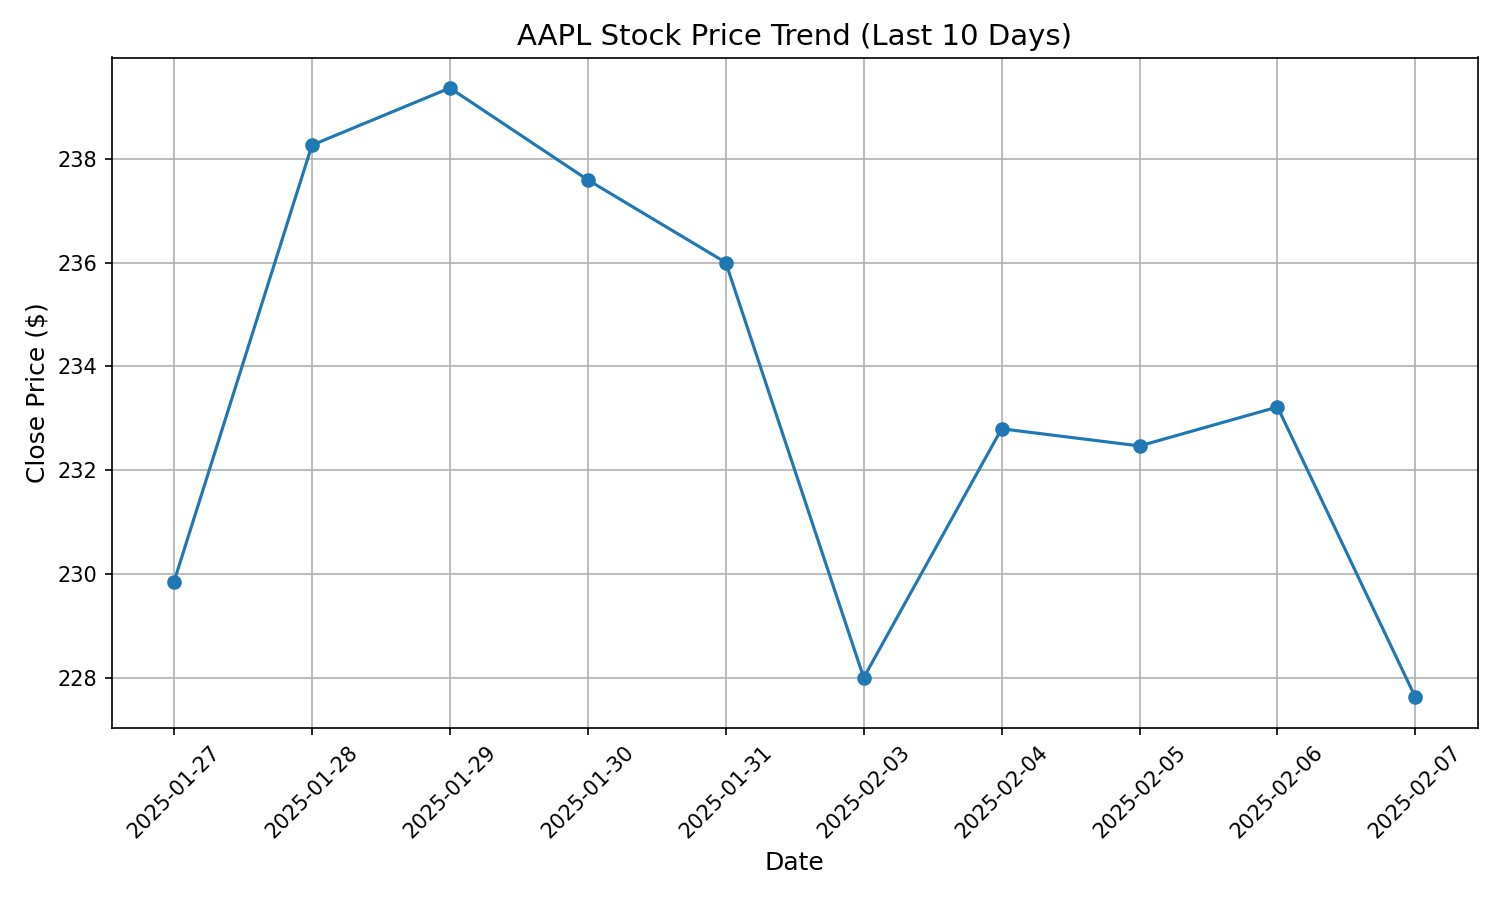

In [19]:
from IPython.display import Image, display
display(Image("aapl_stock_trend.png"))


<hr>

<h2 style="color:#2e7d32;">🎉 Congratulations! You’ve Completed the Lab</h2>

<p>
In this lab, you successfully learned how to:
</p>

<ul>
  <li>✅ Chain multiple agents together in LangChain</li>
  <li>✅ Use <strong>pipe operators</strong> and structured workflows to pass information across tools</li>
  <li>✅ Develop intelligent agents and <strong>equip them with tools</strong> for analytics, reasoning, and graphing</li>
</ul>

<p>
By combining <code>ReAct-style agents</code> with real-world tools like Pandas and Matplotlib, you've built a powerful foundation for building AI assistants that can reason and act.
</p>

<p style="color:#1565c0;"><strong>Enjoy your learning journey!</strong> Keep exploring, building, and pushing the boundaries of what agents can do.</p>
